In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import wordnet as wn
import math
from nltk import bigrams, trigrams
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import nltk
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import wordnet as wn
import math
from collections import Counter
from sklearn.model_selection import GridSearchCV
import re
import string
import joblib
from joblib import dump, load
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import bigrams, trigrams


FAKE NEWS DETECTION

In [3]:
data_fake=pd.read_csv('DataSets\Fake.csv')
data_true=pd.read_csv('DataSets\True.csv')

In [4]:
data_fake["class"]=0
data_true['class']=1

In [5]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [6]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [7]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\mihretabn\AppData\Local\Temp\ipykernel_15544\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\mihretabn\AppData\Local\Temp\ipykernel_15544\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [8]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [9]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [11]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [12]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [13]:
data.isnull().sum() 

text     0
class    0
dtype: int64

In [14]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return text

In [16]:
data['text'] = data['text'].apply(wordopt)

In [17]:
x = data['text']
y = data['class']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [20]:
# Get the shape of the TF-IDF matrix
shape = xv_test.shape

print("Shape of TF-IDF matrix:", shape)

Shape of TF-IDF matrix: (11220, 94798)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object to capture unigrams, bigrams, and trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))  # Capture from unigrams to trigrams

# Vectorize training data
xvt_train = vectorizer.fit_transform(x_train)

# Get the vocabulary and corresponding counts
vocabulary = vectorizer.get_feature_names_out()
counts = xvt_train.sum(axis=0).A1

# Calculate the number of unigrams, bigrams, and trigrams
num_unigrams = sum(len(word.split()) == 1 for word in vocabulary)
num_bigrams = sum(len(word.split()) == 2 for word in vocabulary)
num_trigrams = sum(len(word.split()) == 3 for word in vocabulary)

# Print the results
print("Number of unigrams:", num_unigrams)
print("Number of bigrams:", num_bigrams)
print("Number of trigrams:", num_trigrams)


Number of unigrams: 94798
Number of bigrams: 2271450
Number of trigrams: 6529212


In [20]:
# # Extract bigrams and trigrams from the text column
# bigrams = list(bigrams(data['text']))
# trigrams = list(trigrams(data['text']))

# # Print the bigrams and trigrams
# print("Bigrams:", bigrams[:5])
# print("Trigrams:", trigrams[:5])





Bigrams: [('donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and  the very dishonest fake news media   the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   president angry pants tweeted    will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year   will be a great year for america   donald j  trump   realdonaldtrump  december    s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable  petty  infantile gibberish  only trump  his lack of decency won t even allow

In [21]:
# num_bigrams = len(bigrams)
# num_trigrams = len(trigrams)

# # Print the number of bigrams and trigrams
# print("Number of bigrams:", num_bigrams)
# print("Number of trigrams:", num_trigrams)

Number of bigrams: 44877
Number of trigrams: 44876


In [27]:


#TF-IDF Random Forest
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

In [25]:
#N-Gram Random Forest
RFN = RandomForestClassifier(random_state = 0)
RFN.fit(xvt_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
pred_rf = RF.predict(xv_test)

IndexError: list index out of range

In [24]:
RF.score(xv_test, y_test)

0.9915329768270945

In [25]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5930
           1       0.99      0.99      0.99      5290

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [26]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(xv_train,y_train)
svm_xv_pred = svm_classifier.predict(xv_test)

In [27]:
accuracy = accuracy_score(y_test, svm_xv_pred)
print(f"The accuracy of the SVM classifier is: {accuracy}")

The accuracy of the SVM classifier is: 0.9949197860962566


In [28]:
print (classification_report(y_test, svm_xv_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5930
           1       0.99      1.00      0.99      5290

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [29]:

naive_bayes = MultinomialNB()
naive_bayes.fit(xv_train, y_train)
pred_nb = naive_bayes.predict(xv_test)
print(f"The accuracy of the Naive Bayes classifier is: {naive_bayes.score(xv_test, y_test)}")
print (classification_report(y_test, pred_nb))

The accuracy of the Naive Bayes classifier is: 0.9342245989304813
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5930
           1       0.94      0.92      0.93      5290

    accuracy                           0.93     11220
   macro avg       0.93      0.93      0.93     11220
weighted avg       0.93      0.93      0.93     11220



In [30]:
# def output_lable(n):
#     if n==0:
#         return "Fake News"
#     elif n==1:
#         return "Not A Fake News"
    
# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test['text'] = new_def_test["text"].apply(wordopt)
#     new_x_test = new_def_test["text"]
#     new_xv_test = vectorization.transform(new_x_test)
#     pred_SVM = svm_classifier.predict(new_xv_test)
#     pred_NB = naive_bayes.predict(new_xv_test)
#     pred_RF = RF.predict(new_xv_test)
    
#     return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {}".format(output_lable(pred_SVM[0]),
#                                                                                                               output_lable(pred_NB[0]),
#                                                                                                              output_lable(pred_RF[0])))
                                          

In [31]:
# news = str(input()) 
# manual_testing(news)

In [32]:
dump(RF, 'Models/random_forest_model.joblib')
dump(svm_classifier, 'Models/svm_model.joblib')
dump(naive_bayes, 'Models/naive_bayes_model.joblib')
dump(vectorization, 'Models/tfidf_vectorizer_fake.joblib')



['Models/tfidf_vectorizer_fake.joblib']

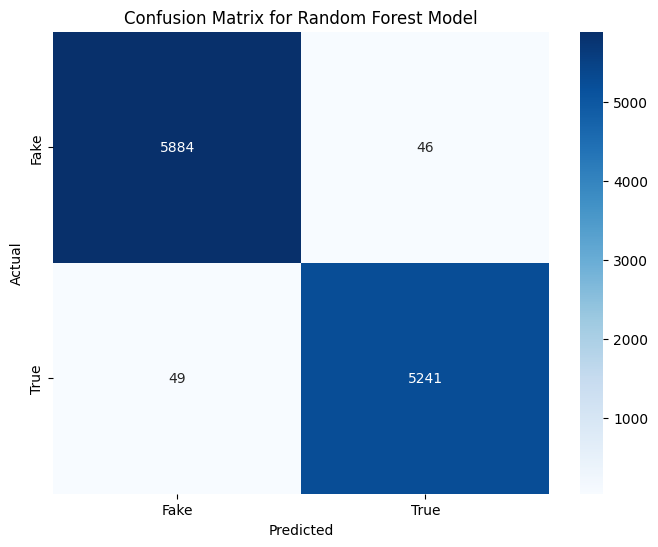

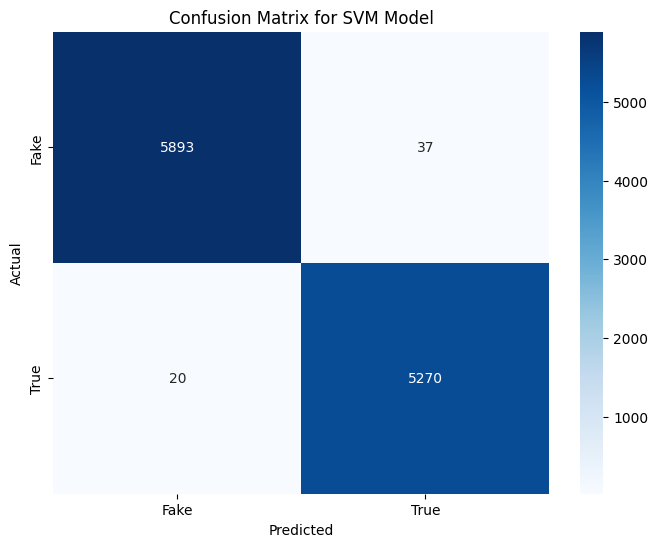

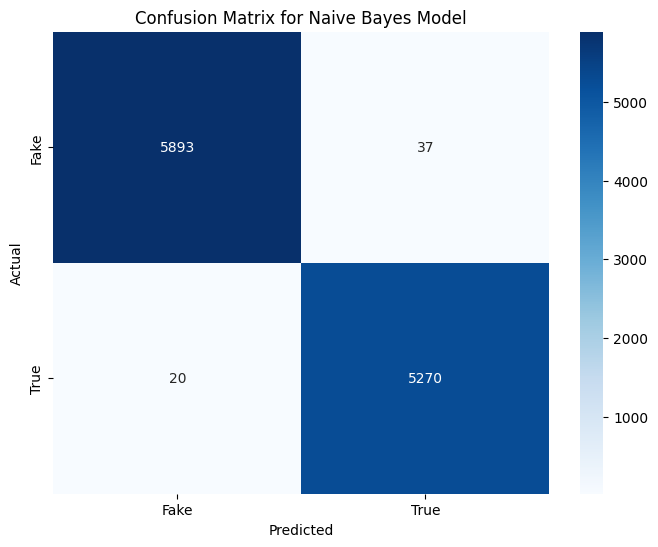

In [33]:
# Generate confusion matrix for Random Forest model

rf_cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

# Generate confusion matrix for SVM model

svm_cm = confusion_matrix(y_test, svm_xv_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Model")
plt.show()

# Generate confusion matrix for LSTM model
nb_cm = confusion_matrix(y_test, pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()


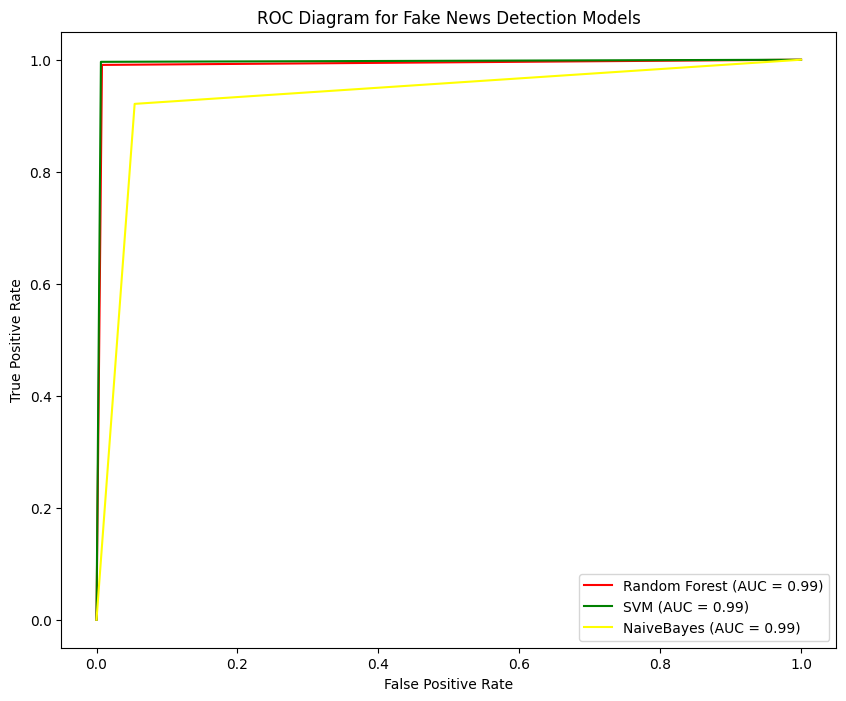

In [34]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate ROC curves and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, pred_rf)
rf_auc = auc(rf_fpr, rf_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_xv_pred)
svm_auc = auc(svm_fpr, svm_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, pred_nb)
nb_auc = auc(svm_fpr, svm_tpr)


# Create ROC diagram
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC curves for each model
ax.plot(rf_fpr, rf_tpr, color='red', label='Random Forest (AUC = %0.2f)' % rf_auc)
ax.plot(svm_fpr, svm_tpr, color='green', label='SVM (AUC = %0.2f)' % svm_auc)
ax.plot(nb_fpr, nb_tpr, color='yellow', label='NaiveBayes (AUC = %0.2f)' % nb_auc)

# Add legend and labels
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Diagram for Fake News Detection Models')

# Show plot
plt.show()

AI_GENERATED CONTENT DETECTION

In [35]:
human_data = pd.read_csv('DataSets\human.csv')
gpt_data = pd.read_csv("DataSets\GPT.csv")

In [36]:
ai_data = pd.concat([gpt_data, human_data], ignore_index=True)
ai_data= ai_data.sample(frac=1)

In [37]:

# Feature extraction functions
def sentence_length(text):
    text = str(text)
    sentences = nltk.sent_tokenize(text)
    numberofsentences = len(sentences)
    total_words = 0
    for i in sentences:
        total_words += len(i.split())
    avg_sentence = total_words / numberofsentences
    return numberofsentences, avg_sentence

def repetitivewords(text):
    text = str(text)
    token = nltk.word_tokenize(text.lower())
    synsets = []
    for i in token:
        synsets.extend(wn.synsets(i))
    synonyms = []
    for synset in synsets:
        synonyms.append([lemma.name() for lemma in synset.lemmas()])
    repeat = 0
    for index in range(len(synonyms)):
        for nextindex in range(index+1, len(synonyms)):
            if len(set(synonyms[index]) & set(synonyms[nextindex])) > 0:
                repeat += 1
    return repeat / len(token)

def entropy(text):
    text = str(text)
    tokens = nltk.word_tokenize(text.lower())
    tokennumber = Counter(tokens)
    total = len(tokens)
    numberofprobs = []
    for count in tokennumber.values():
        prob = count / total
        numberofprobs.append(prob)
    entropy = 0.0
    for i in numberofprobs:
        if i > 0:
            entropy -= i * (math.log(i, 2))
    return entropy

def count_punctuation(text):
     text = str(text)
     sentences = nltk.sent_tokenize(text)
     numberofsentences = len(sentences)
     count = 0
     for char in text:
          if char in string.punctuation:
              count += 1
     return count / numberofsentences if numberofsentences > 0 else 0

def count_numbers(text):
    count = len(list(filter(lambda w: any([c.isdigit() for c in w]), text.split())))
    num_sentences = len(nltk.sent_tokenize(text))
    return count / num_sentences if num_sentences > 0 else 0

In [38]:
ai_data.head()

,text,generated
2809,Advanced Build Combat is here for you! Start t...,1
9161,"For a brief spell, ­Deutsche Bank was the toas...",0
6099,"The couple, formally the Duke and Duchess of S...",0
2694,The best-selling Japanese artist and the autho...,1
1359,"Heidi Beirich, director of the Intelligence Pr...",1


In [39]:

# Extract features
ai_data['Sentence_length'], ai_data['Average_sentence_length'] = zip(*ai_data['text'].apply(sentence_length))
ai_data['Repetitive_words'] = ai_data['text'].apply(repetitivewords)
ai_data['Entropy'] = ai_data['text'].apply(entropy)
ai_data['Punctuation_count'] = ai_data['text'].apply(count_punctuation)
ai_data['Numbers_count'] = ai_data['text'].apply(count_numbers)


In [40]:
ai_data.columns

Index(['text', 'generated', 'Sentence_length', 'Average_sentence_length',
       'Repetitive_words', 'Entropy', 'Punctuation_count', 'Numbers_count'],
      dtype='object')

In [41]:
X = ai_data.drop(columns=['generated'])
X = X.drop(columns=['Sentence_length'])
y = ai_data["generated"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Split data into training, validation, and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [43]:
# Extract TF-IDF features
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['text'])
X_val_tfidf = tfidf.transform(X_val['text'])
X_test_tfidf = tfidf.transform(X_test['text'])

In [44]:
# Store the extracted TF-IDF features
X_train['tfidf'] = list(X_train_tfidf.toarray())
X_val['tfidf'] = list(X_val_tfidf.toarray())
X_test['tfidf'] = list(X_test_tfidf.toarray())

In [45]:
# Combine TF-IDF features with the extracted features
X_train_features = X_train.drop(columns=['text']).to_numpy()
X_val_features = X_val.drop(columns=['text']).to_numpy()
X_test_features = X_test.drop(columns=['text']).to_numpy()

In [46]:
# Combine TF-IDF features with the scaled extracted features
# Prepare the feature matrix
X_train_combined = np.column_stack((X_train['Average_sentence_length'].values,
                                    X_train['Repetitive_words'].values,
                                    X_train['Entropy'].values,
                                    X_train['Punctuation_count'].values,
                                    X_train['Numbers_count'].values,
                                    X_train_tfidf.toarray()))

X_val_combined = np.column_stack((X_val['Average_sentence_length'].values,
                                  X_val['Repetitive_words'].values,
                                  X_val['Entropy'].values,
                                  X_val['Punctuation_count'].values,
                                  X_val['Numbers_count'].values,
                                  X_val_tfidf.toarray()))

X_test_combined = np.column_stack((X_test['Average_sentence_length'].values,
                                   X_test['Repetitive_words'].values,
                                   X_test['Entropy'].values,
                                   X_test['Punctuation_count'].values,
                                   X_test['Numbers_count'].values,
                                   X_test_tfidf.toarray()))

In [47]:
rf_params = {'n_estimators': [50, 100],
             'max_depth': [None, 30]}
lr_params = {'C': [0.1, 1, 10],
             'solver': ['newton-cg', 'liblinear']}
nb_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [48]:
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_svm = SVC(random_state=42)
model_nb = MultinomialNB()

In [49]:
grid_rf = GridSearchCV(model_rf, rf_params, cv=5)
grid_rf.fit(X_val_combined, y_val)
best_rf_params = grid_rf.best_params_

In [50]:
grid_lr = GridSearchCV(model_lr, lr_params, cv=5)
grid_lr.fit(X_val_combined, y_val)
best_lr_params = grid_lr.best_params_

In [51]:

grid_nb = GridSearchCV(model_nb,nb_params,cv=5)
grid_nb.fit(X_val_combined,y_val)
best_nb_params=grid_nb.best_params_


In [52]:
# Train models with optimal parameters
model_rf = RandomForestClassifier(**best_rf_params, random_state=42)
model_rf.fit(X_train_combined, y_train)



RandomForestClassifier(random_state=42)

In [53]:
model_lr = LogisticRegression(**best_lr_params, random_state=42, max_iter=1000)
model_lr.fit(X_train_combined, y_train)



LogisticRegression(C=10, max_iter=1000, random_state=42, solver='newton-cg')

In [54]:
model_nb=MultinomialNB(**best_nb_params)
model_nb.fit(X_train_combined, y_train)

MultinomialNB(alpha=0.001)

In [55]:
# Model evaluation
models = {'Random Forest': model_rf,
          'Logistic Regression': model_lr,
          'Naive Bayes': model_nb}
for name, model in models.items():
    y_pred_train = model.predict(X_train_combined)  # Predict the labels for the training data
    train_report = classification_report(y_train, y_pred_train, output_dict=True)

    train_precision = train_report['macro avg']['precision']
    train_recall = train_report['macro avg']['recall']
    train_f_measure = train_report['macro avg']['f1-score']
    train_accuracy = train_report['accuracy']

    print("{} Train Evaluation:".format(name))
    print("  Precision: {:.5f}".format(train_precision))
    print("  Recall: {:.5f}".format(train_recall))
    print("  F-measure: {:.5f}".format(train_f_measure))
    print("  Accuracy: {:.5f}\n".format(train_accuracy))

    y_pred_test = model.predict(X_test_combined)  # Predict the labels for the testing data
    test_report = classification_report(y_test, y_pred_test, output_dict=True)

    test_precision = test_report['macro avg']['precision']
    test_recall = test_report['macro avg']['recall']
    test_f_measure = test_report['macro avg']['f1-score']
    test_accuracy = test_report['accuracy']

    print("{} Test Evaluation:".format(name))
    print("  Precision: {:.5f}".format(test_precision))
    print("  Recall: {:.5f}".format(test_recall))
    print("  F-measure: {:.5f}".format(test_f_measure))
    print("  Accuracy: {:.5f}\n".format(test_accuracy))

Random Forest Train Evaluation:
  Precision: 1.00000
  Recall: 1.00000
  F-measure: 1.00000
  Accuracy: 1.00000

Random Forest Test Evaluation:
  Precision: 0.73406
  Recall: 0.73326
  F-measure: 0.73308
  Accuracy: 0.73333

Logistic Regression Train Evaluation:
  Precision: 0.99382
  Recall: 0.99383
  F-measure: 0.99382
  Accuracy: 0.99382

Logistic Regression Test Evaluation:
  Precision: 0.76130
  Recall: 0.76060
  F-measure: 0.76049
  Accuracy: 0.76067

Naive Bayes Train Evaluation:
  Precision: 0.90343
  Recall: 0.90334
  F-measure: 0.90337
  Accuracy: 0.90338

Naive Bayes Test Evaluation:
  Precision: 0.67472
  Recall: 0.67345
  F-measure: 0.67277
  Accuracy: 0.67333



In [56]:
dump(model_rf, 'Models/random_forest_model.joblib')
dump(model_lr, 'Models/logistic_regression_model.joblib')
dump(model_nb, 'Models/naive_bayes_model.joblib')
dump(tfidf, 'Models/tfidf_vectorizer_ai.joblib')

['Models/tfidf_vectorizer_ai.joblib']

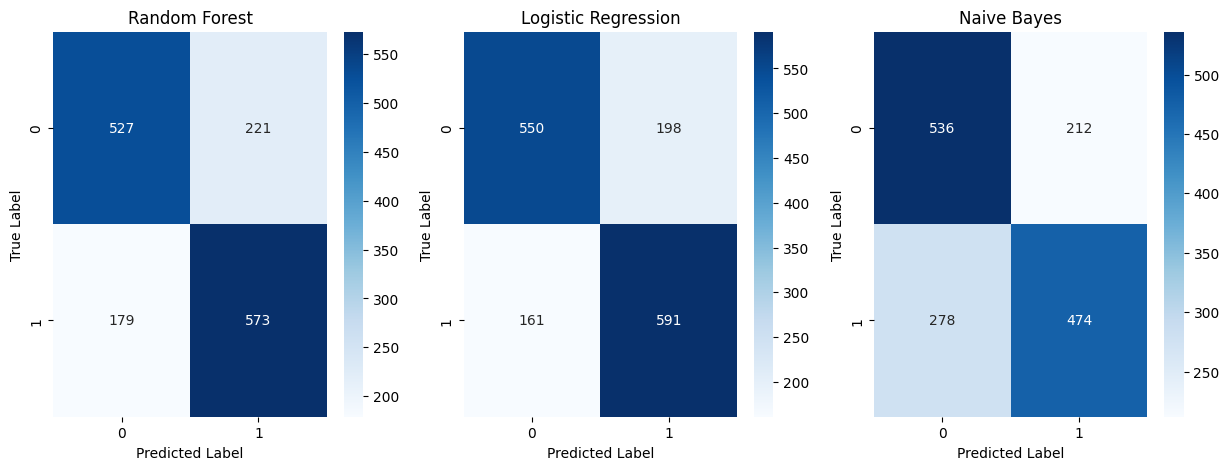

In [57]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their names
models = [model_rf, model_lr, model_nb]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

# Iterate through each model and create a confusion matrix
for i, model in enumerate(models):
    # Predict the labels for the test data
    y_pred = model.predict(X_test_combined)

    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(model_names[i])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Show the plot
plt.show()

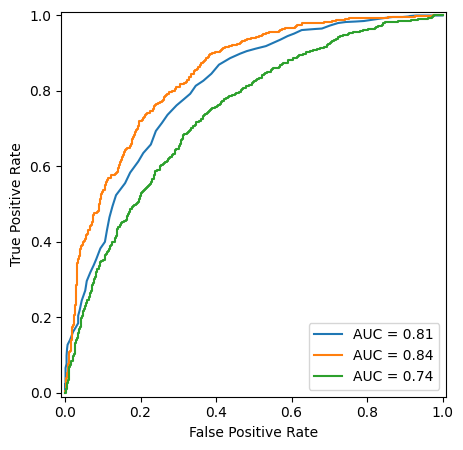

In [58]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Define the models and their names
models = [model_rf, model_lr, model_nb]
model_names = ['Random Forest', 'Logistic Regression', 'Naive Bayes']

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(7, 5))

# Iterate through each model and plot the ROC curve
for i, model in enumerate(models):
    # Predict probability scores for the test data
    y_prob = model.predict_proba(X_test_combined)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax)

# Add legend and labels
ax.legend()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Show the plot
plt.show()

In [62]:
def predict_news(text):
  # Preprocess the text
  text = wordopt(text)
  # Vectorize the text
  xv_test = vectorization.transform([text])
  # Predict the class using the SVM model
  svm_prediction = svm_classifier.predict(xv_test)[0]
  # Predict the probability of being AI-generated using the Random Forest model
  rf_prob = RF.predict_proba(xv_test)[0][1] * 100
  # Print the results
  if svm_prediction == 0:
    print("The news is Real.")
  else:
    print("The news is Fake.")
  print("The probability of the news being AI-generated is {:.2f}%.".format(rf_prob))

# Get user input
user_input = input("Enter a news article: ")

# Predict the news
predict_news(user_input)

The news is Real.
The probability of the news being AI-generated is 55.00%.


In [60]:
# from joblib import load
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Load the SVM model and TF-IDF vectorizer for fake news detection
# svm_model = joblib.load('Models/svm_model.joblib')
# tfidf_vectorizer_fake = joblib.load('Models/tfidf_vectorizer_fake.joblib')

# # Load the Random Forest model and TF-IDF vectorizer for AI detection
# rf_model = joblib.load('Models/random_forest_model.joblib')
# tfidf_vectorizer_ai = joblib.load('Models/tfidf_vectorizer_ai.joblib')


# # def output_lable(n):
# #     if n==0:
# #         return "Fake News"
# #     elif n==1:
# #         return "Not A Fake News"


# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test['text'] = new_def_test["text"].apply(wordopt)
#     new_x_test = new_def_test["text"]
#     new_xv_test = tfidf_vectorizer_fake.transform(new_x_test)
#     pred_SVM = svm_model.predict(new_xv_test)

#     if pred_SVM == 0:
#       print("The news is Real.")
#     else:
#       print("The news is Fake.")
    
    
#     # return print("\n\This is likely to be a: {} ".format(output_lable(pred_SVM[0])))


# # Define the function to calculate sentence length and average sentence length
# def calculate_sentence_length(text):
#   sentences = nltk.sent_tokenize(text)
#   sentence_length = len(sentences)
#   avg_sentence_length = sum(len(sentence.split()) for sentence in sentences) / sentence_length if sentence_length > 0 else 0
#   return sentence_length, avg_sentence_length

# def detect_ai_percentage(text):
#     # Extract features
#   # Call the function to calculate sentence length
#   sentence_length, avg_sentence_length = calculate_sentence_length(text) 
#   repetitive_words = repetitivewords(text)
#   entropy_value = entropy(text)
#   punctuation_count = count_punctuation(text)
#   numbers_count = count_numbers(text)

#   # Vectorize the text
#   text_tfidf = tfidf_vectorizer_ai.transform([text]).toarray()

#   # Combine features
#   features = np.array([avg_sentence_length, repetitive_words, entropy_value, punctuation_count, numbers_count])
#   # Reshape features to be 2D
#   features = features.reshape(1,-1)  # Reshape to a 2D array
#   combined_features = np.hstack((features, text_tfidf))

#   # Predict using the Random Forest model
#   prediction = rf_model.predict_proba(combined_features)[0][1]

#   return prediction * 100

# # Get user input
# user_input = input("Enter the text you want to analyze: ")

# # Detect fake news
# news = str(input()) 
# manual_testing(news)
# # Detect AI percentage
# ai_percentage = detect_ai_percentage(user_input)
# print(f"The likelihood of this text being written by AI is: {ai_percentage:.2f}%")

The news is Fake.
The likelihood of this text being written by AI is: 26.00%
